<a href="https://colab.research.google.com/github/SisirBhargav/Zeta-aiml/blob/main/newspaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#dataframes
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#upload local files
uploaded=files.upload()

#get filename
aaa=list(uploaded.keys())[0]

#read csv file using pandas
df=pd.read_csv(aaa)
df.head(10)



Saving NewspaperData.csv to NewspaperData.csv


,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [5]:
df.info()
df.select_dtypes(include=np.number).corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


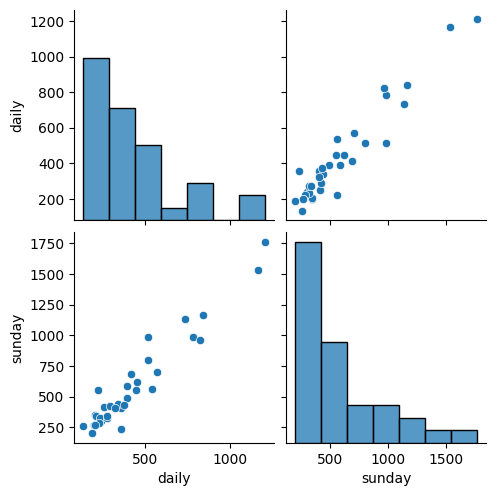

In [11]:
#pairplots
import seaborn as sns
sns.pairplot(df)

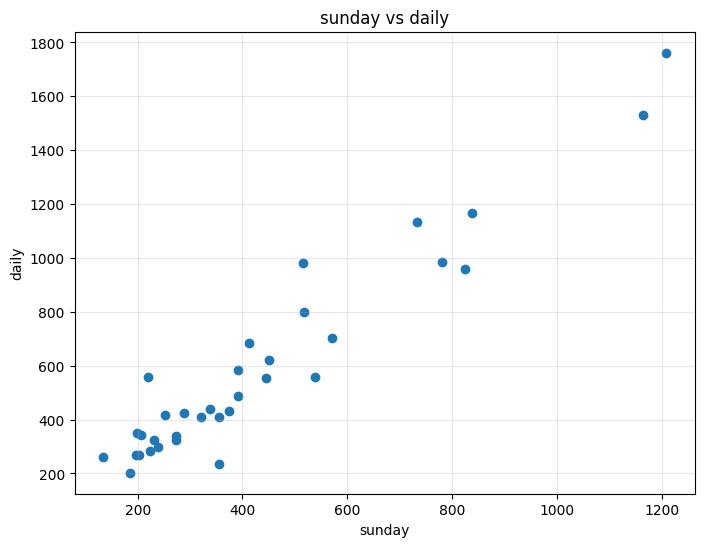

In [6]:
#scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['daily'],df['sunday'])
plt.title("sunday vs daily")
plt.xlabel("sunday")
plt.ylabel("daily")
plt.grid(alpha=0.3)
plt.show()


In [7]:
#corelation of daily and sunday
correlation=df['daily'].corr(df['sunday'])
print(correlation)

0.9581543140785462


In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model=smf.ols('daily~sunday',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  daily   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        06:46:56   Log-Likelihood:                -195.45
No. Observations:                  34   AIC:                             394.9
Df Residuals:                      32   BIC:                             398.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8321     25.257      1.023      0.3

<Axes: xlabel='sunday', ylabel='daily'>

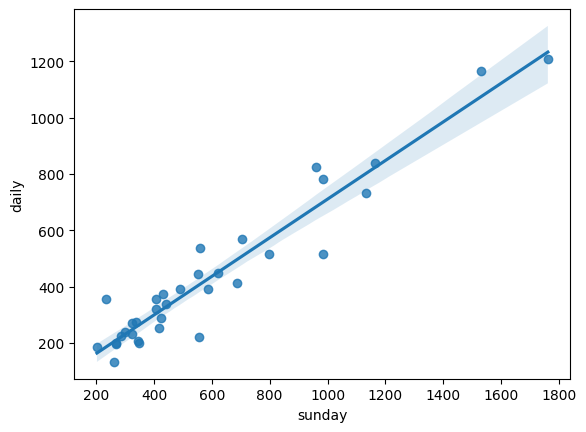

In [9]:
import seaborn as sns
sns.regplot(x='sunday',y='daily',data=df)

In [12]:
import statsmodels.formula.api as smf
ml=smf.ols('sunday~daily',data=df).fit()
print(ml.tvalues,'\n', ml.pvalues)


Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [13]:
(ml.rsquared,ml.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [17]:
#new data for prediction
new_data=pd.DataFrame({'daily':45},index=[0])
new_data

,daily
0,45


In [18]:
final_ml_model=smf.ols('sunday~daily',data=df).fit()
final_ml_model.predict(new_data)

,0
0,74.122794
